**Assignment-1 (Mathematics for Machine Learning)**

In [ ]:
#region Import Statements

import pandas as pd
from math import exp, factorial

#endregion

#region Question 1

class EnumNoOfAce():
  '''
  Enum class for choosing between number of ace cards.
  '''
  ACE_0 = 0 # 0 cards.
  ACE_1 = 1 # 1 cards.
  ACE_2 = 2 # 2 cards.

class Cards():
  #region Constants

  '''
  Total number of cards in one pack, i.e. 52, a pack of 52 cards.
  '''
  PACK_OF_CARDS = 52

  '''
  Total number of cards having Ace in one pack, i.e. 4 out of 52 cards.
  '''
  TOTAL_ACE_CARDS = 4

  #endregion

class WithoutReplacement(Cards):
  '''
  Class for finding probability and contruct tables for
  '''

  def get_discrete_probability_distribution_table(self, total_such_cards = 4):
    probability_distribution = []

    for number_of_ace_cards in range(total_such_cards): # 0, 1, and 2 aces
      probability = self.probability_calculation(number_of_ace_cards, total_such_cards)
      probability_distribution.insert(number_of_ace_cards, probability)

    return pd.DataFrame(enumerate(probability_distribution), columns = ['x', 'P(x)']) # Sending the data in the form of DataFrame.

  def compute_probability(self, number_of_cards = 0):
    # Switching between number of ace cards:
    if number_of_cards == EnumNoOfAce.ACE_0:
      # (48 / 52) * (47 / 51)
      return ((self.PACK_OF_CARDS - self.TOTAL_ACE_CARDS) / self.PACK_OF_CARDS) \
            * ((self.PACK_OF_CARDS - self.TOTAL_ACE_CARDS - 1) / (self.PACK_OF_CARDS - 1))
    elif number_of_cards == EnumNoOfAce.ACE_1:
      # (4 / 52) * (48 / 51) + (48 / 52) * (4 / 51)
      return ((self.TOTAL_ACE_CARDS / self.PACK_OF_CARDS) * (self.PACK_OF_CARDS - self.TOTAL_ACE_CARDS - 1) / (self.PACK_OF_CARDS - 1)) \
            + (((self.PACK_OF_CARDS - self.TOTAL_ACE_CARDS) / self.PACK_OF_CARDS) * (self.TOTAL_ACE_CARDS / (self.PACK_OF_CARDS - 1)))
    elif number_of_cards == EnumNoOfAce.ACE_2:
      # (4 / 52) * (3 / 51)
      return (self.TOTAL_ACE_CARDS / self.PACK_OF_CARDS) \
            * ((self.TOTAL_ACE_CARDS - 1) / (self.PACK_OF_CARDS - 1))
    else:
      return 0

  def probability_calculation(self, number_of_cards = 0, total_such_cards = 4) -> float:
    '''
    ---
    :param number_of_cards: Number of a specific card. (Ace Card.)
    :param total_such_cards: Total number of such cards in a pack of cards. (Total Ace Cards.)
    :type number_of_cards: int
    :type total_such_cards: int
    :return: Provides the probability based on the given `number_of_cards` and `total_such_cards`.
    :rtype: float
    ---
    '''

    return self.compute_probability(number_of_cards)

  def draw_probability_distribution_table(self, distribution):
    '''
    To draw a chart representing the discrete probability distribution for the valeus of x.
    ---
    :param distribution: Instance of DataFrame from Pandas module for plotting the chart.
    :type distribution: DataFrame
    :return: Provides a line graph having information regarding the distribution of the probability.
    :rtype: PlotAccessor
    ---
    '''
    return distribution.plot(x = 'x', y = 'P(x)',
                             title = 'Discrete Probability Distribution for X',
                             xticks = list(range(self.TOTAL_ACE_CARDS)), yticks = [x * 0.1 for x in range (0, 10 + 1)],
                             xlabel = 'Number of Ace cards', ylabel = 'Probability of getting an Ace')

#endregion

#region Question 2

class Bag:

  def __init__(self, red, black):
    self.red = red
    self.black = black

  def total(self):
    return self.red + self.black

class ProbabilityAtRandom(WithoutReplacement):

  def probability_bag(self, bags) -> float:
    return 1 / len(bags)

  def probability_red(self, bag):
    return bag.red / bag.total()

  def probability_black(self, bag):
    return bag.black / bag.total()

  def probability_bag_black(self, bags):
    if len(bags) == 2:
      return self.probability_black(bags[1]) * self.probability_bag(bags) \
             / ((self.probability_black(bags[0]) * self.probability_bag(bags)) + (self.probability_black(bags[1]) * self.probability_bag(bags)))
    return None

#endregion

#region Question 3

class ProbabilityWithReplacement:

  def __init__(self, red_balls, black_balls, total_drawns):
    self.red_balls = red_balls
    self.black_balls = black_balls
    self.total_balls = self.red_balls + self.black_balls
    self.total_drawns = total_drawns

  def find_probability(self, red_balls_drawn, black_balls_drawn):
    # P(Red Balls)
    probability_of_red = self.red_balls / self.total_balls

    # P(Black Balls)
    probability_of_black = self.black_balls / self.total_balls

    # Find probability.
    return (probability_of_red ** red_balls_drawn) * (probability_of_black ** black_balls_drawn)

  def probability_with_replacement(self, drawn_event):
    total_possibility = 0

    for drawn_sequence in drawn_event:
      total_possibility += self.find_probability(red_balls_drawn = drawn_sequence.count('R'), black_balls_drawn = drawn_sequence.count('B'))

    return total_possibility

#endregion

#region Question 4

class ProbabilityCallCenter:

  def __init__(self, k, l) -> None:
    '''
    Initializes the `k` and lambda for finding the probability.
    ---
    :param k: The number of occurance.
    :param l: Lambda, the average rate at which the call receives.
    :type k: int
    :type l: int
    :rtype: None
    ---
    '''
    self.k = k
    self.l = l

  def factorial(self, number):
    if type(number) == int:
      if number <= 1:
        return 1
      return number * factorial(number - 1)
    return None

  def poisson_distribution(self, k, l):
    return (l ** k) * exp(-l) / self.factorial(k)

  def probability_customer_call_center(self):
    return sum(self.poisson_distribution(i, self.l) for i in range(self.k + 1))

  def __init__(self, k, l) -> None:
    '''
    Initializes the `k` and lambda for finding the probability.
    ---
    :param k: The number of occurance.
    :param l: Lambda, the average rate at which the call receives.
    :type k: int
    :type l: int
    :rtype: None
    ---
    '''
    self.k = k
    self.l = l

  def factorial(self, number):
    if type(number) == int:
      if number <= 1:
        return 1
      return number * factorial(number - 1)
    return None

  def poisson_distribution(self, k, l):
    return (l ** k) * exp(-l) / self.factorial(k)

  def probability_customer_call_center(self):
    return sum(self.poisson_distribution(i, self.l) for i in range(self.k + 1))

#endregion

#region Question 5

class ProbabilityCesterCollege(ProbabilityCallCenter):

  def probability_cester_college_call(self):
    return 1 - self.poisson_distribution(0, self.l)

#endregion

#region Question 6

class Eigen:

  def __init__(self, matrix):
    self.matrix = matrix

  def eigen_value_and_vector(self, iterations = 1000):
    eigen_vector = [1.0, 0.0, 0.0]

    for _ in range(iterations):
      result = [sum(self.matrix[row][col] * eigen_vector[col] for col in range(3)) for row in range(3)]

      eigen_vector = [x / max(result) for x in result]

    eigen_value = sum(result[row] / eigen_vector[row] for row in range(3)) / 3

    return eigen_value, eigen_vector

#endregion

#region Question 7

class MatrixManipulation:

  def __init__(self, matrix):
    if len(matrix) == 2:
      self.matrix = matrix

  def matrix_inverse(self):
    # Performed without using Linalg.
    a, b = self.matrix[0][0], self.matrix[0][1]
    c, d = self.matrix[1][0], self.matrix[1][1]

    # A * D - B * C
    determinant = (self.matrix[0][0] * self.matrix[1][1]) \
                  - (self.matrix[0][1] * self.matrix[1][0])

    if determinant != 0:
      formulated_inverse_matrix = [[d, -b],
                                  [-c, a]]

      formulated_inverse_matrix = [[element / determinant for element in row] for row in formulated_inverse_matrix]

      return formulated_inverse_matrix

#endregion

<h2>
<b>Q1.</b> You draw two cards from a pack of 52 shuffled cards (without replacement). <b>Create a Python Program</b> to generate a Probability Distribution Table for getting zero to at most 2 ACES. <b>(4 Marks)</b>
<br>
</h2>

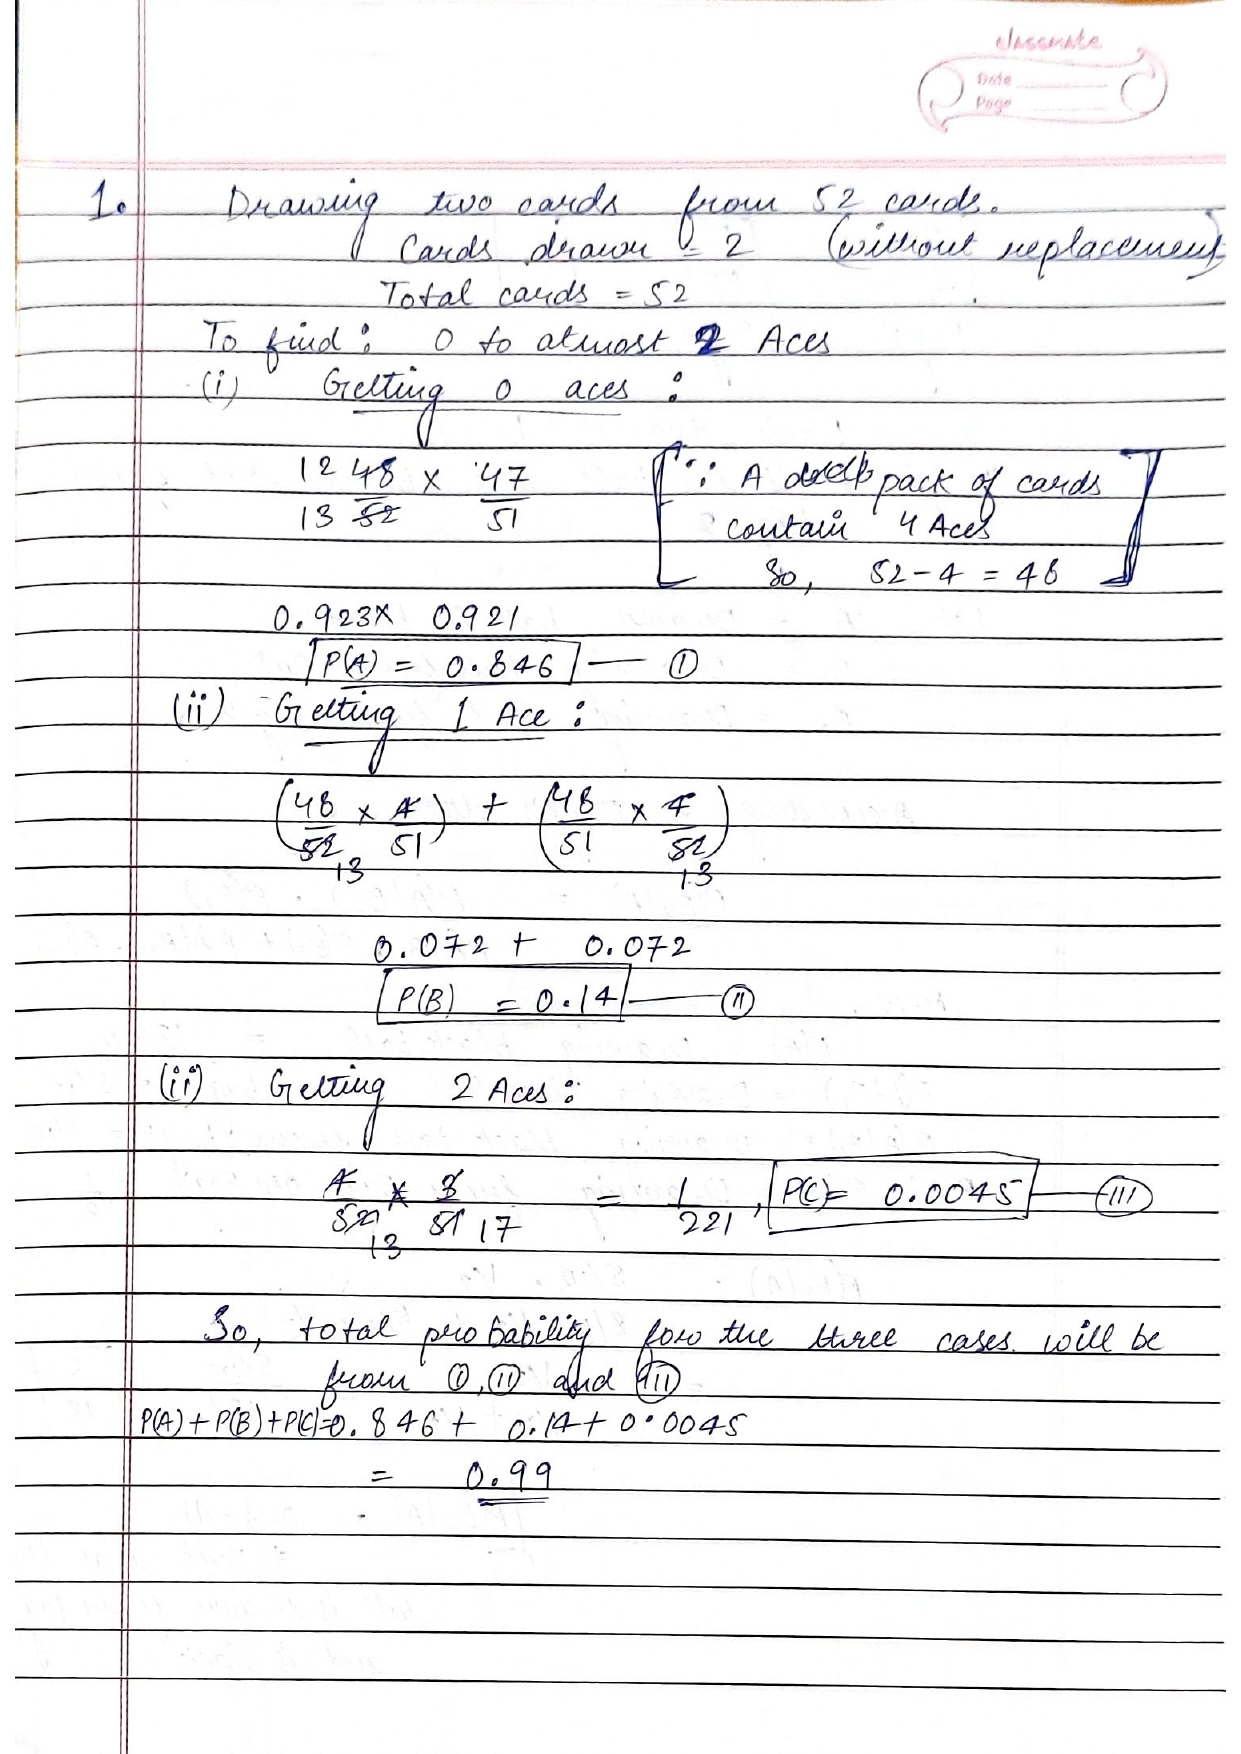

In [ ]:
# Discrete Probability Distribution Table for getting zero to at most 2 Ace Cards.
wr = WithoutReplacement()
wr.get_discrete_probability_distribution_table(4)

x      P(x)
0  0  0.850679
1  1  0.143288
2  2  0.004525
3  3  0.000000

from matplotlib import pyplot as plt
_df_7['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['P(x)'].plot(kind='hist', bins=20, title='P(x)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='x', y='P(x)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['x']
  ys = series['P(x)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('x', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('x')
_ = plt.ylabel('P(x)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['x']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'x'}, axis=1)
              .sort_values('x', ascending=True))
  xs = counted['x']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('x', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('x')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['P(x)'].plot(kind='line', figsize=(8, 4), title='P(x)')
plt.gca().spines[['top', 'right']].set_visible(False)

<h2>
Q2. Bag I contain 2 red and 8 black balls while another Bag II contains 5 red and 5 black balls. One ball is drawn at random from one of the bags, and it is found to be black. <b>Create a Python Program</b> to find the probability that it was drawn from Bag 2. <b>(4 Marks)</b>
<br>
</h2>

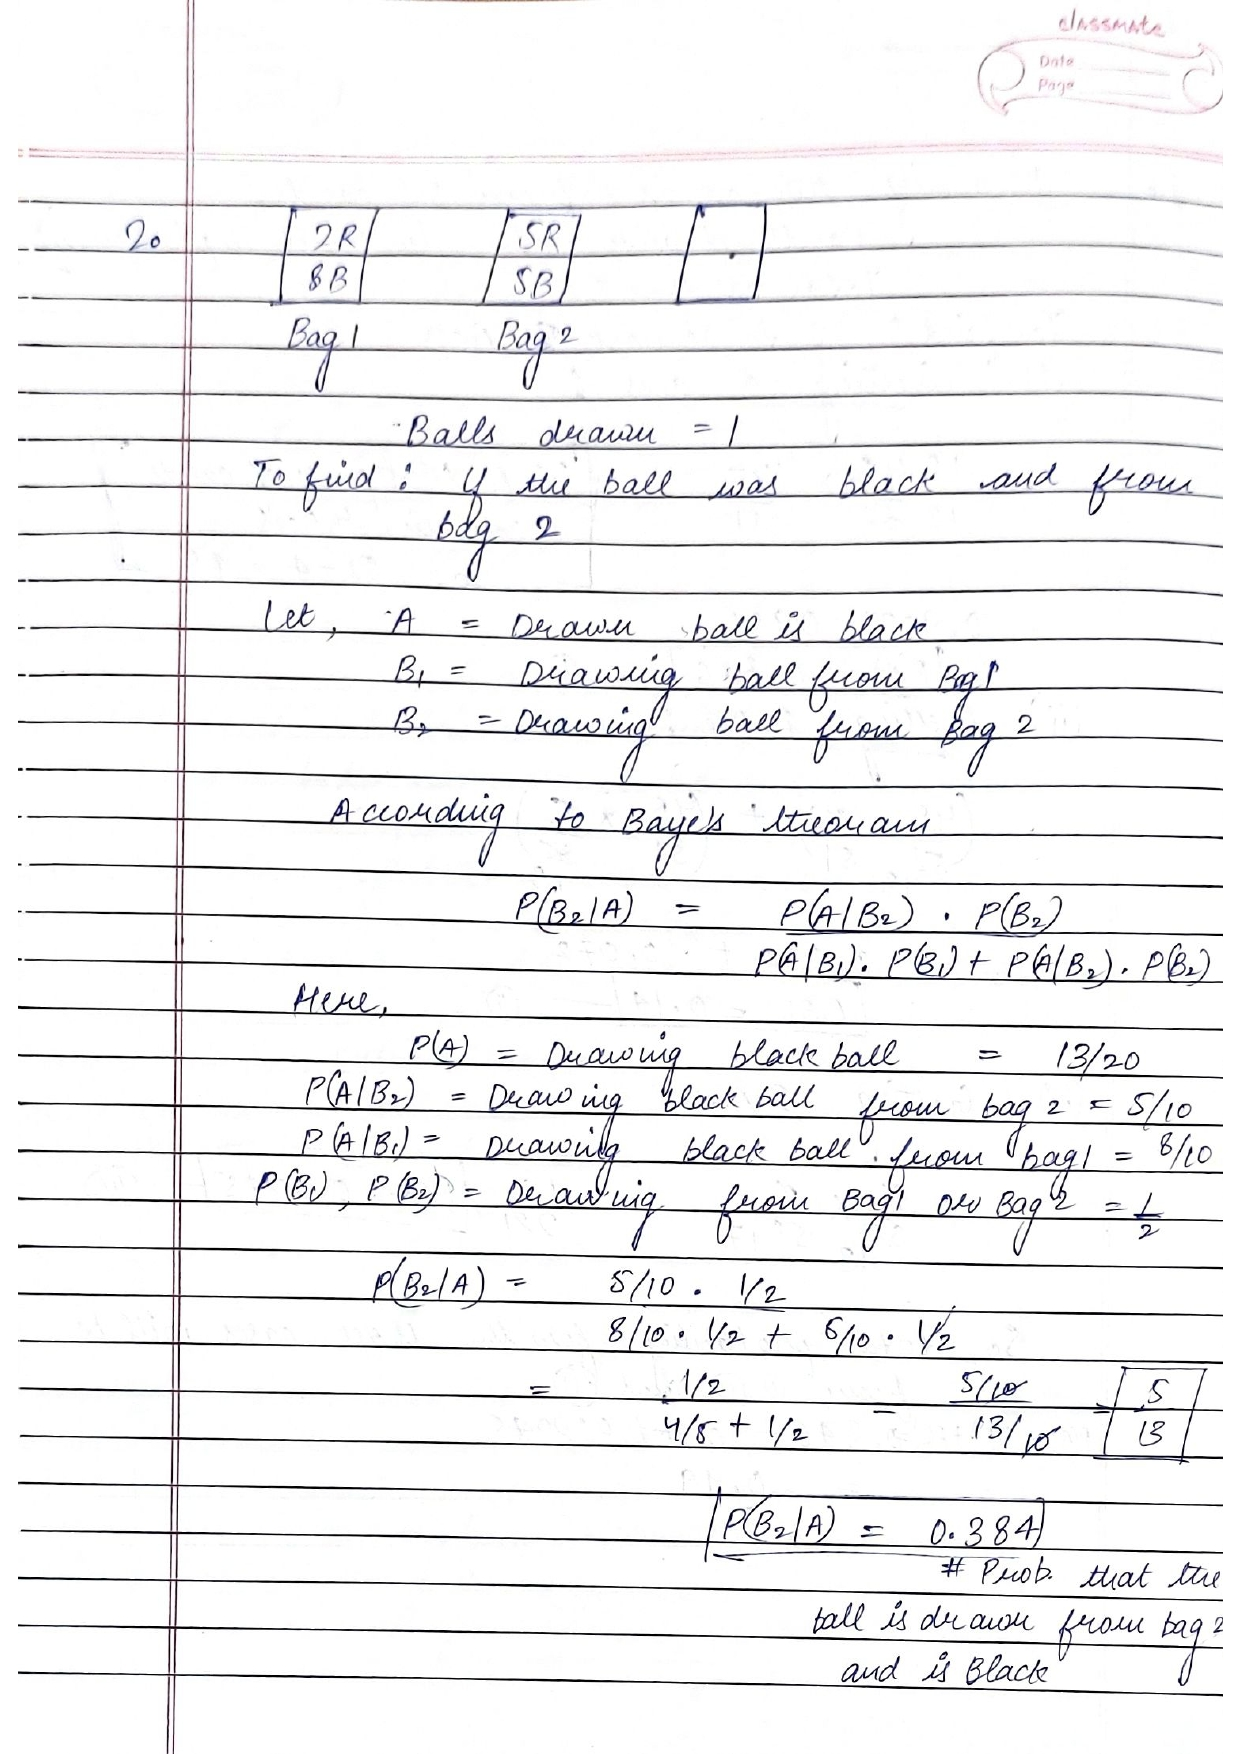

In [ ]:
# Filling the bags:
bag1 = Bag(red = 2, black = 8)
bag2 = Bag(red = 5, black = 5)
bags = [bag1, bag2]

# Probability of getting a black ball of bag 2.
par = ProbabilityAtRandom()
par.probability_bag_black(bags)

0.3846153846153846

<h2>
Q3. There are 3 red and 7 black balls in a bag. You are asked to draw 3 balls at random (with replacement) in three different trials, <b>Create a Python Program</b> to find the probability of getting two red balls and one black ball? <b>(4 Marks)</b>
<br>
</h2>

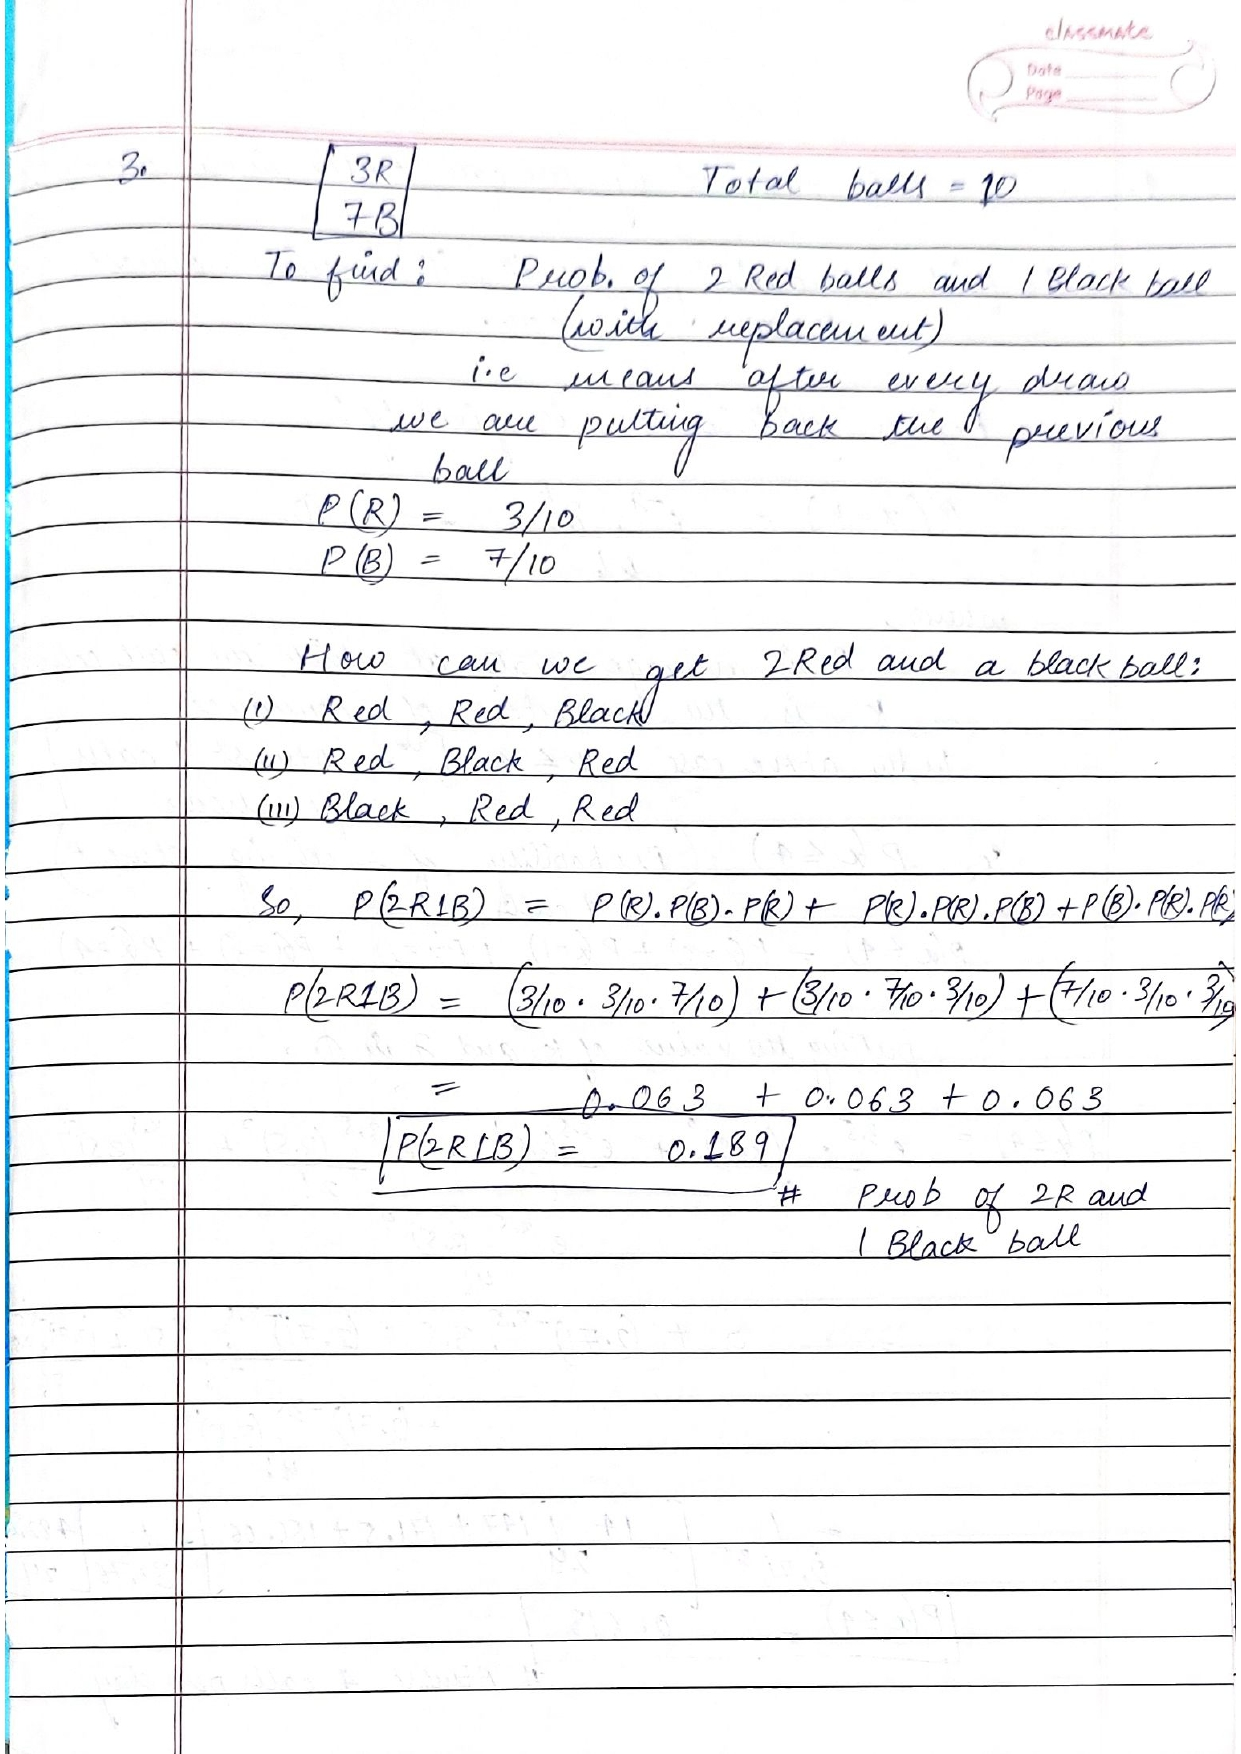

In [ ]:
# Probability of getting two red balls and one black ball in three different trials with replacement.
pwr = ProbabilityWithReplacement(red_balls = 3, black_balls = 7, total_drawns = 3)
pwr.probability_with_replacement(['RRB', 'RBR', 'BRR']) # That's two red balls and one black ball's probability.

0.189

<h2>
Q4. A Customer Call center receives on average 3.5 calls every hour. <b>Write a Python Program</b> to find the probability that it will receive at most 4 calls every hour? <b>(4 Marks)</b>
<br>
</h2>

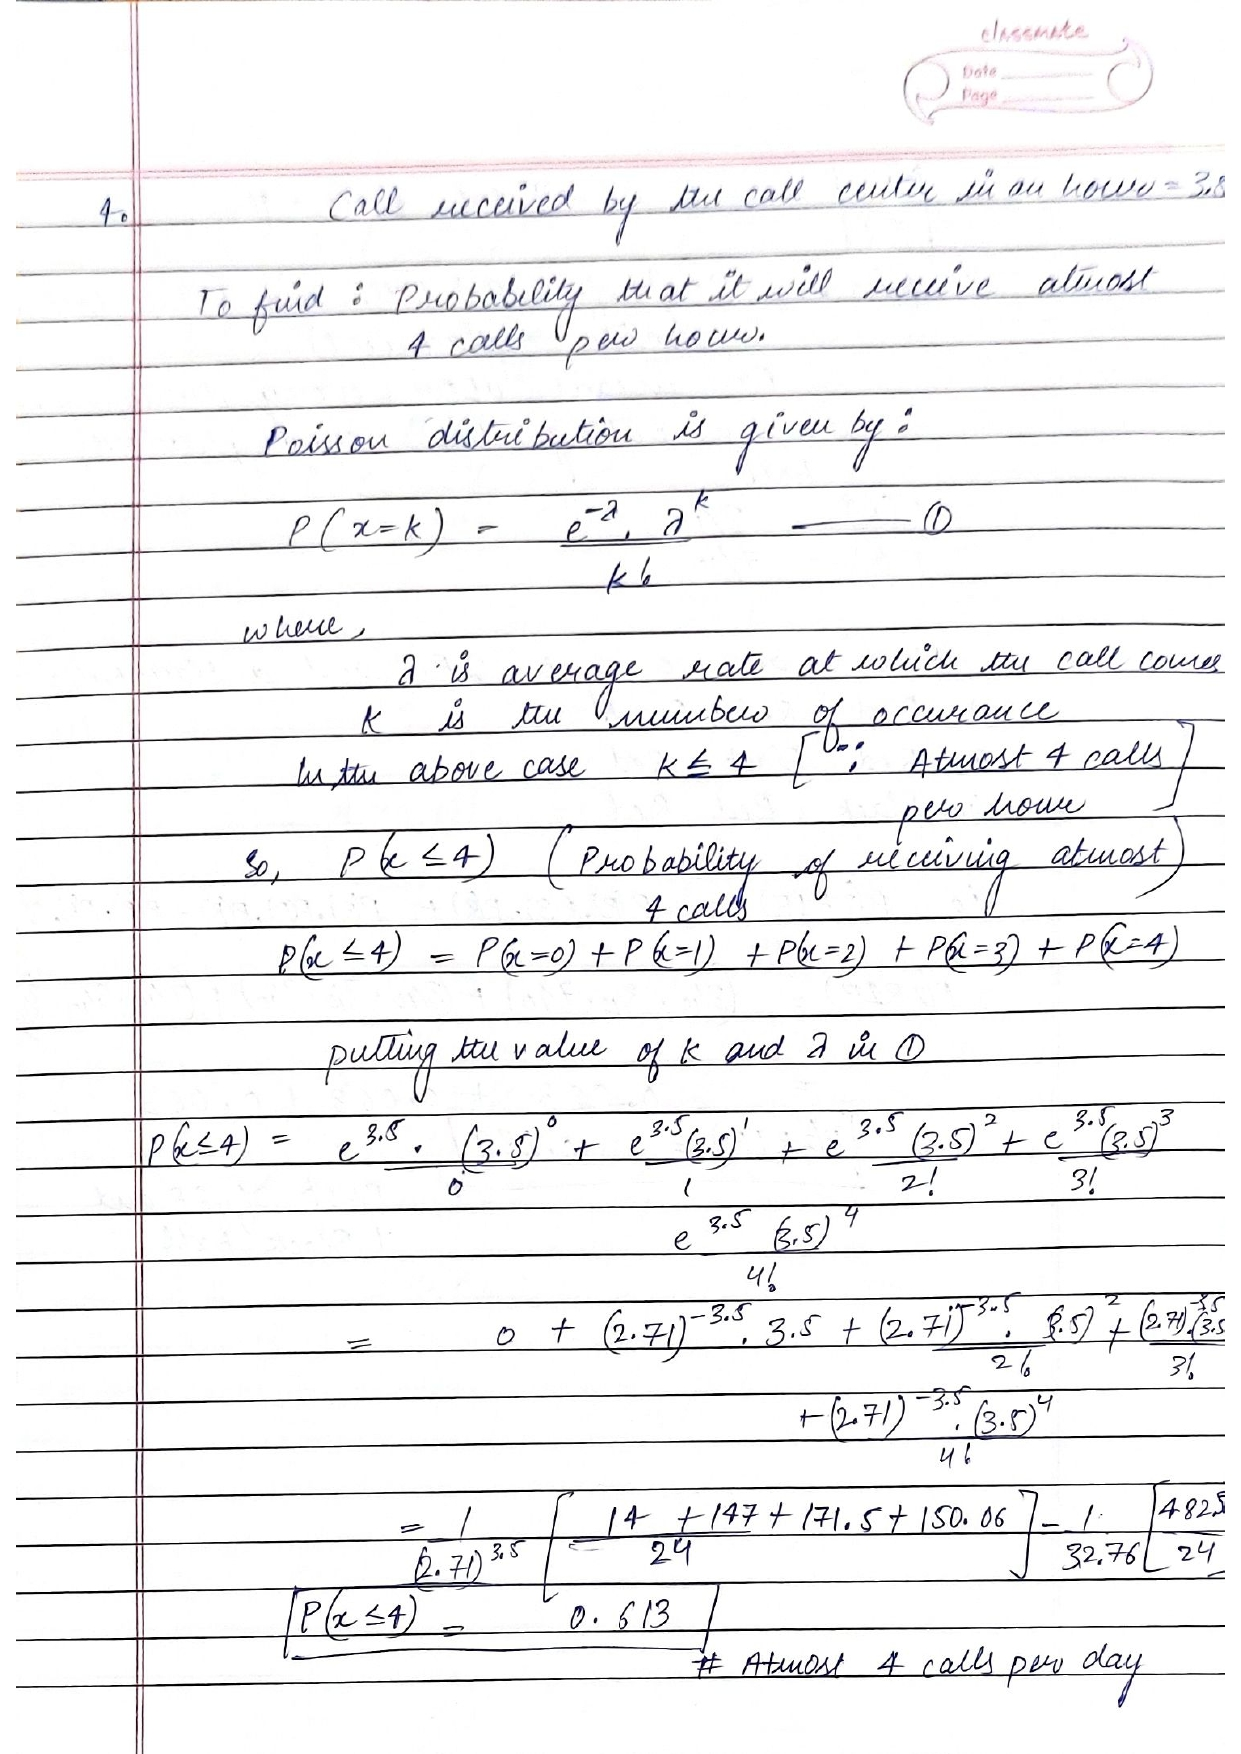

In [ ]:
# Probability of receiving at most four calls every hour.
pcc = ProbabilityCallCenter(4, 3.5)
pcc.probability_customer_call_center() # The probability of receiving at most 4 calls every hour.

0.7254449533096046

<h2>
Q5. The Student Services at Cestar College receives 2 phone calls per hour. <b>Write a Python Program</b> to find the probability that a phone call will come within the next hour. <b>(4 Marks)</b>
<br>
</h2>

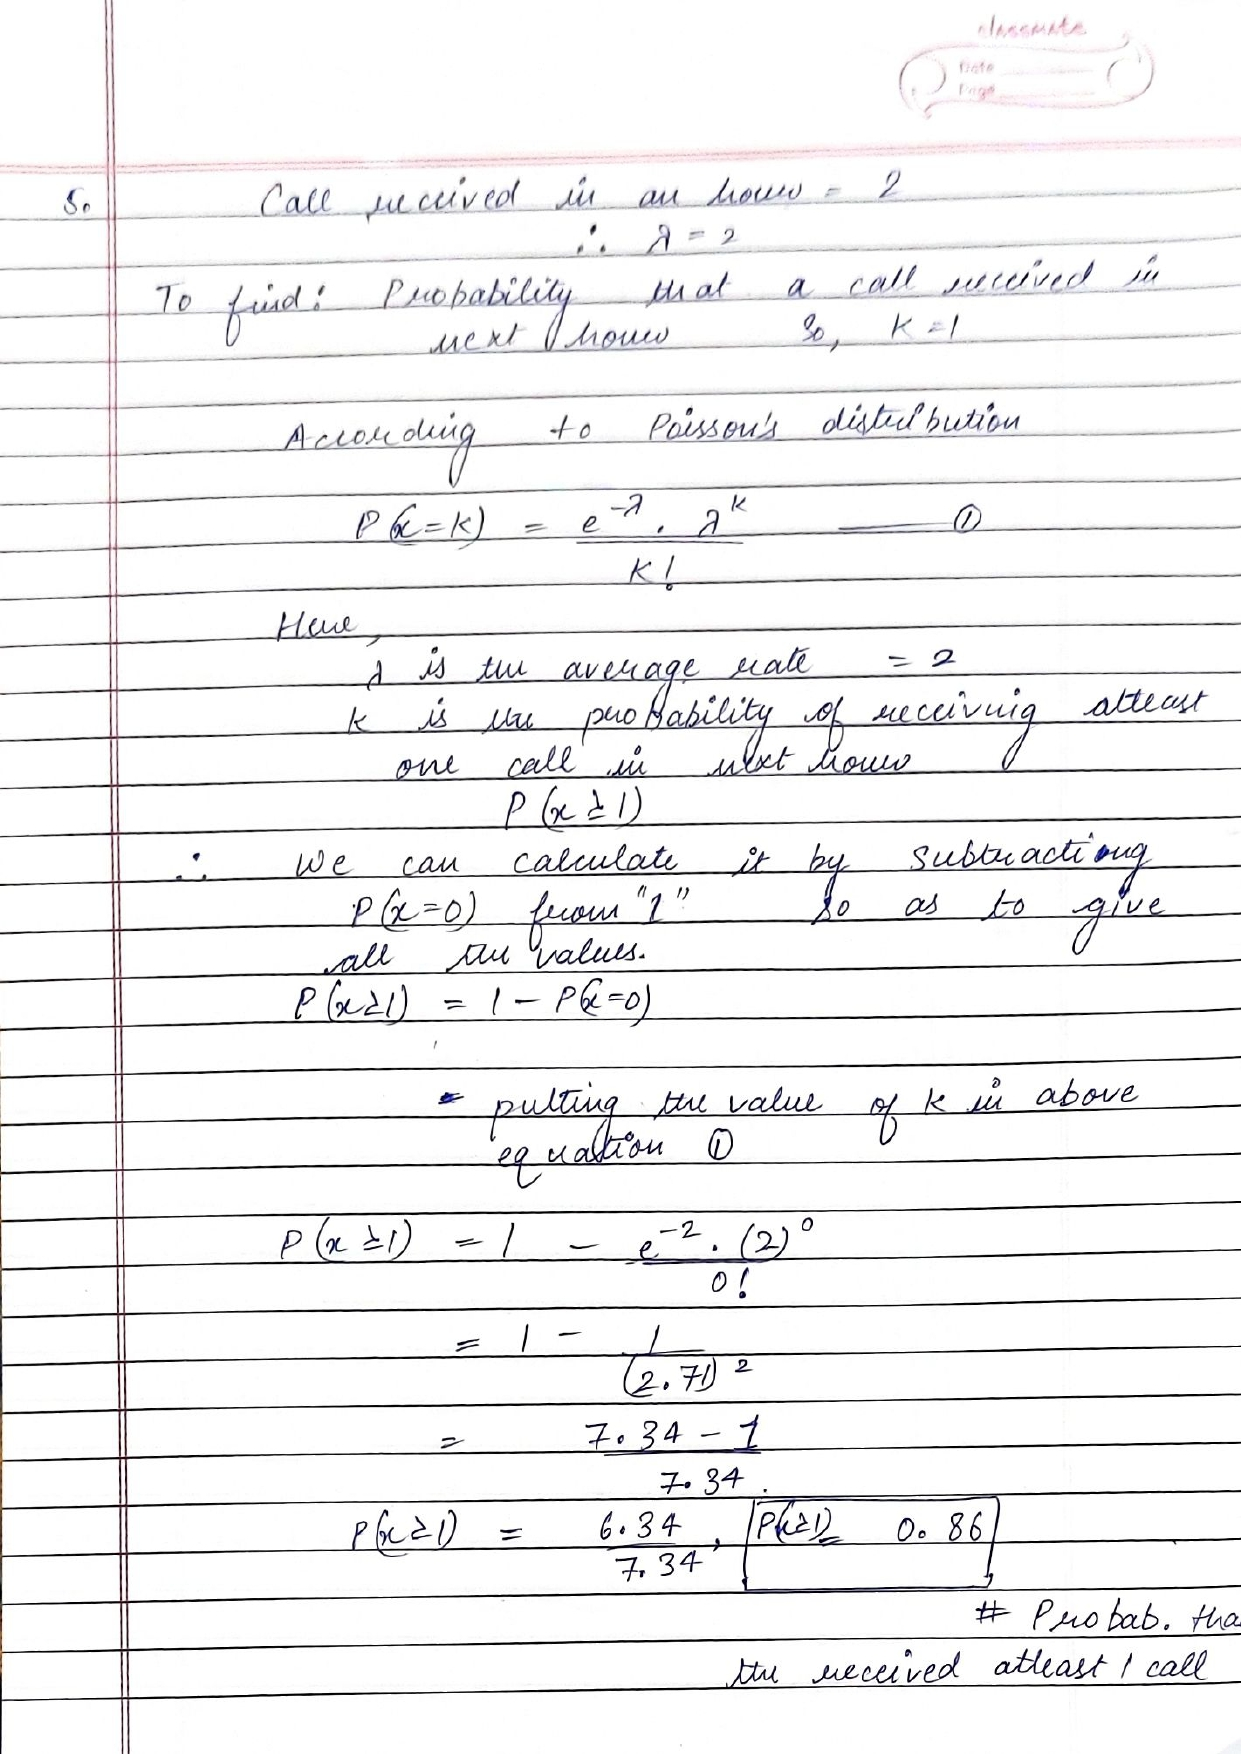

In [ ]:
# The probability that a phone call within the next hour.
pcc = ProbabilityCesterCollege(0, 2)
pcc.probability_cester_college_call()

0.8646647167633873

<h2>
Q6. <b>Create a Python Program</b> to generate the Eigen Value and Eigen Vector for the following Matrix (3x3 dimension) <b>(4 Marks)</b>
<br>
[8  5  3]
<br>
[5  6  5]
<br>
[9  7  4]
<br>
</h2>

In [ ]:
# Input for finding Eigen Value & Eigen Vector.
input = [
    [8, 5, 3],
    [5, 6, 5],
    [9, 7, 4]
]

piev = Eigen(input)

result = piev.eigen_value_and_vector()

print(f'Eigen Value: { result[0] }')
print(f'Eigen Vector: { result[1] }')

Eigen Value: 16.925804201859762
Eigen Vector: [0.7966925898828724, 0.8222244132734156, 1.0]


<h2>
Q7. <b>Create a Python Program</b> to find the Inverse of the following Matrix, using the concept shown in the class. Use of Linalg is restricted. <b>(4 Marks)</b>
<br>
[7 2]
<br>
[3 -5]
</h2>

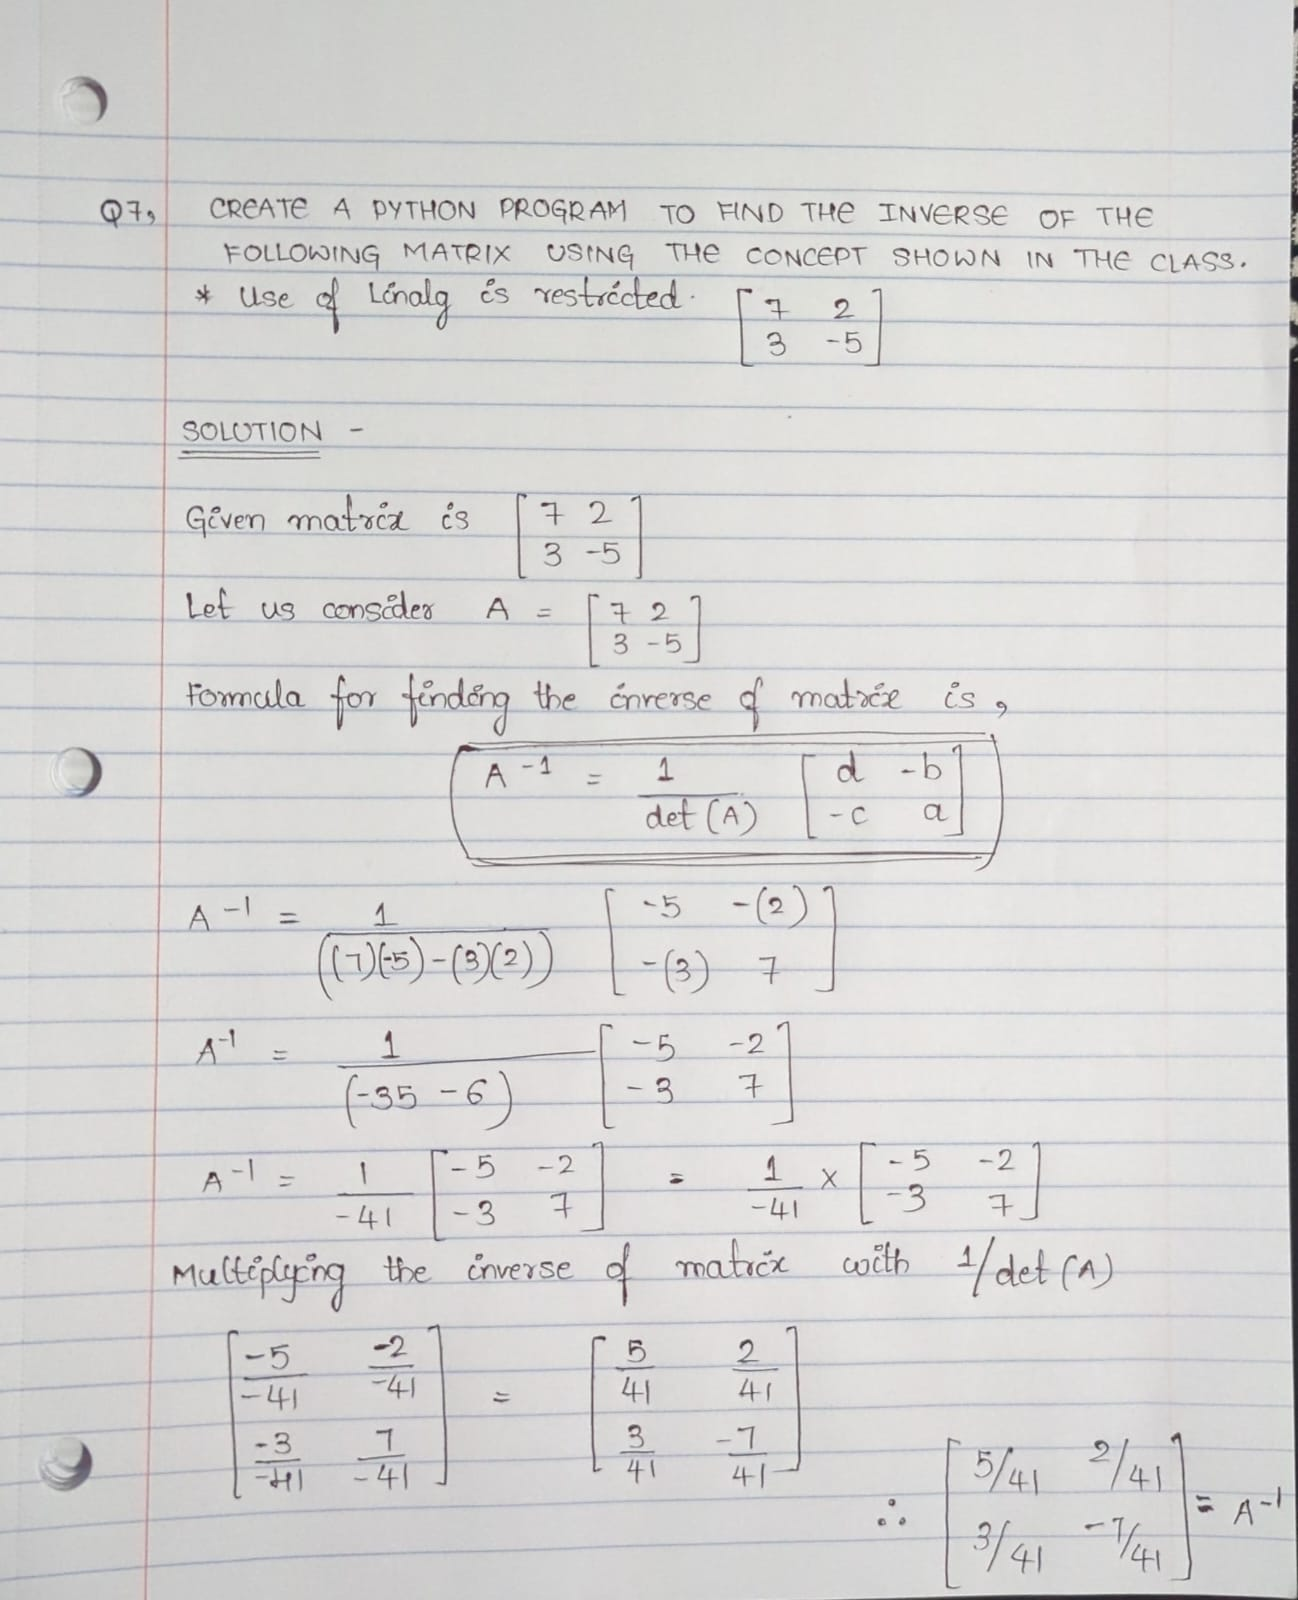

In [ ]:
input = [
    [7, 2],
    [3, -5]
]

mm = MatrixManipulation(input)
for matrix_element in mm.matrix_inverse():
  print(matrix_element)

[0.12195121951219512, 0.04878048780487805]
[0.07317073170731707, -0.17073170731707318]
